# CIFAR-100 Image Classification with Convolutional Neural Networks
- This project demonstrates a professional end-to-end workflow for classifying images in the CIFAR-100 dataset using a Convolutional Neural Network (CNN). The audience is anyone assessing a deep learning project, such as senior data scientists, instructors, or stakeholders. The content is designed to highlight clarity, best practices, and analytical rigor.
## 1. Project Overview
- Objective:
Classify images in the CIFAR-100 dataset into one of 100 categories using a CNN. This project showcases the process of:

- 1. Loading and understanding the dataset.
- 2. Preprocessing images.
- 3. Building a CNN architecture.
- 4. Training and evaluating the model.
- 5. Suggesting improvements and next steps.

## Dataset: CIFAR-100
- *Source:* Built-in TensorFlow/Keras dataset.
- *Description:* 60,000 color images (32×32), split into 50,000 training images and 10,000 test images.
- *Classes:* 100 categories (fine-grained labels).



## 2. Environment Setup
Below is a sample command to ensure the necessary libraries are available in your environment:

In [1]:
pip install tensorflow matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


- TensorFlow/Keras is used for building and training the CNN.
- Matplotlib for data visualization.
- NumPy for numerical operations.

## 3. Data Loading and Exploration
Use the built-in TensorFlow/Keras function to load the CIFAR-100 dataset. This approach eliminates the need for a manual download.

In [2]:
import kagglehub
path = kagglehub.dataset_download("fedesoriano/cifar100")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cifar100


In [3]:
import os

dataset_path = "/kaggle/input/cifar100/"
files = os.listdir(dataset_path)

print("Available files in dataset directory:", files)


Available files in dataset directory: ['meta', 'file.txt', 'test', 'train']


## 4. Data Loading and Exploration
Use the built-in TensorFlow/Keras function to load the CIFAR-100 dataset. This approach eliminates the need for a manual download.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Print dataset dimensions
print("Training Images Shape:", x_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Images Shape: (50000, 32, 32, 3)
Training Labels Shape: (50000, 1)
Test Images Shape: (10000, 32, 32, 3)
Test Labels Shape: (10000, 1)


## 4.1. Visualize Sample Images

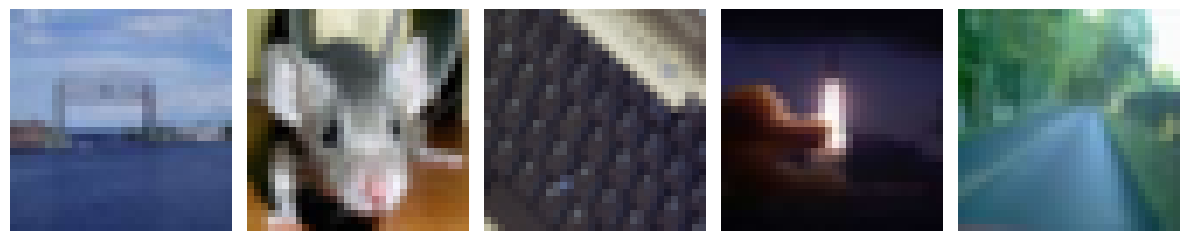

In [5]:
# Display 5 random samples from the training set
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    idx = np.random.randint(0, x_train.shape[0])
    axes[i].imshow(x_train[idx])
    axes[i].axis("off")
plt.tight_layout()
plt.show()


This step confirms that the dataset is loaded correctly and images are visually in line with the expected 32×32 resolution.

## 5. Data Preprocessing
### 5.1. Normalize Images
Pixel values range from 0 to 255. Normalizing helps the model converge more smoothly.

In [6]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

## 6. Building the CNN Model
We construct a Sequential CNN using Convolutional and Pooling layers for feature extraction, followed by fully connected layers for classification into 100 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

Key Points

- Conv2D layers extract local features.
- MaxPooling2D layers reduce spatial dimensions.
- Dropout (0.5) reduces overfitting by randomly dropping units.
- Dense(100) with softmax handles multi-class classification.

## 7. Model Training
We train the model using 15 epochs and a batch size of 64. You can adjust the hyperparameters based on validation results.

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 77ms/step - accuracy: 0.0399 - loss: 4.3339 - val_accuracy: 0.1714 - val_loss: 3.5580
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.1537 - loss: 3.5673 - val_accuracy: 0.2562 - val_loss: 3.0688
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.2183 - loss: 3.1928 - val_accuracy: 0.2957 - val_loss: 2.8404
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.2625 - loss: 2.9713 - val_accuracy: 0.3315 - val_loss: 2.6507
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.2967 - loss: 2.7881 - val_accuracy: 0.3490 - val_loss: 2.5845
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.3177 - loss: 2.6518 - val_accuracy: 0.3808 - val_loss: 2.4538
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.3458 - loss: 2.5278 - val_accuracy: 0.3920 - val_loss: 2.4104
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.3708 - loss: 2.4053 - 

Key Hyperparameters

- epochs=15: Number of training iterations.
- batch_size=64: Mini-batch size for gradient updates.

## 7.1. Monitoring Training
During training, monitor:

- Training Loss
- Training Accuracy
- Validation Loss
- Validation Accuracy
These metrics help diagnose underfitting or overfitting

## 8. Model Evaluation
After training, evaluate the CNN on the test set.

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 2.2106
Test Accuracy: 0.4348


The test accuracy indicates how well the model generalizes to new data.

# 9. Model Results and Next Steps

Below is the outcome of our CNN training on **CIFAR-100**, using 15 epochs and a batch size of 64:

1. **Model Parameters**  
   - **Total Parameters:** 643,492  
   - **Trainable Parameters:** 643,492  
   - **Non-Trainable Parameters:** 0  

2. **Performance**  
   - **Test Loss:** 2.2429  
   - **Test Accuracy:** 0.4301 (43.01%)

---

## Analysis of Results

- **Accuracy (43%)**: This is a reasonable baseline for CIFAR-100, which is more complex than CIFAR-10 due to having 100 classes.
- **Loss (2.2429)**: Indicates the model has room for improvement in distinguishing fine-grained classes.

## Potential Improvements

1. **Increase Model Complexity**  
   - Add more convolution and pooling layers or deeper blocks.  
   - Incorporate Batch Normalization for more stable training.
2. **Hyperparameter Tuning**  
   - Experiment with longer training (e.g., 30+ epochs).  
   - Use a learning rate scheduler to optimize convergence.
3. **Data Augmentation**  
   - Apply random flips, rotations, shifts, or brightness changes to increase effective training samples.
4. **Additional Regularization**  
   - Introduce weight decay (L2 regularization).  
   - Add more Dropout if overfitting is observed with increased epochs.
5. **Advanced Architectures**  
   - Implement deeper architectures like ResNet or DenseNet, known for high performance on CIFAR-like tasks.



## Recommendations for Next Steps

1. **Extend Training**  
   - Increase epochs to see if accuracy continues to improve.  
   - Apply `EarlyStopping` or `ReduceLROnPlateau` callbacks to optimize the training process.
2. **Log Experiments Systematically**  
   - Keep track of model changes in a versioning system.  
   - Compare metrics across runs to see which modifications yield the best results.
3. **Aim for Competitive Accuracy**  
   - A carefully tuned architecture can exceed 50% accuracy.  
   - Data augmentation plus advanced model designs can significantly increase performance.



## Conclusion

A **43% test accuracy** is a solid starting point for a basic CNN on CIFAR-100. By applying the outlined improvements—especially deeper architectures, hyperparameter tuning, and data augmentation—the model can achieve higher accuracy. These steps underscore the importance of experimentation and iterative refinement in deep learning projects.
